In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

In [ ]:
BODY_COLOR = '#D2042D'
ACCESSORY_COLOR = '#981E22'
EYE_COLOR = '#FFFF00'
PUPIL_COLOR = 'black'
FANG_COLOR = 'white'
LINE_COLOR = 'black'
LINE_WIDTH = 4

In [ ]:
Shapes={
    'body': [
        (-3, 19.5), (3, 19.5), (8, 18), (12.5, 13), (11, 8),
        (12, 5), (15, 6), (18, 5), (19, 2), (17, -1), (13.5, 0.5),
        (11.5, -5), (13, -8), (17, -8.5), (22, -11), (20, -12.5),
        (22, -14), (18, -12), (14, -10), (11, -9), (9, -14),
        (13.5, -16), (13.5, -20), (4, -20), (4.5, -16.5), (2, -16.5),
        (-2, -16.5), (-4.5, -16.5), (-4, -20), (-13.5, -20),
        (-13.5, -16), (-9, -14), (-11, -5), (-12, 2), (-13.5, 5),
        (-17, 4.5), (-18.5, 6), (-17.5, 8.5), (-14, 8.5), (-12.5, 7.5),
        (-11.5, 9), (-12.5, 13), (-8, 18), (-3, 19.5)
    ],
    'right_horn': [(2, 19.2), (6.5, 23), (7, 18)],
    'left_horn': [(-2, 19.2), (-6.5, 23), (-7, 18)],
    'right_eye_sclera': [(2.5, 10.5), (9, 9.5), (8, 14), (3.5, 14.5)],
    'left_eye_sclera': [(-2.5, 10.5), (-9, 9.5), (-8, 14), (-3.5, 14.5)],
    'right_pupil': [(5, 11.5), (7, 11), (7.5, 12), (5.5, 12.5)],
    'left_pupil': [(-5, 11.5), (-7, 11), (-7.5, 12), (-5.5, 12.5)],
    'mouth_line': ([-4.5, -2, 0, 2, 4.5], [8, 6.5, 6, 6.5, 8]),
    'right_fang': [(2, 8), (3.5, 8), (2.75, 5.5)],
    'left_fang': [(-2, 8), (-3.5, 8), (-2.75, 5.5)],
}

In [ ]:
def draw_cat_on_axis(ax, shapes_data):

    def draw_outline_and_fill(coords, fill_color, z, lw=LINE_WIDTH):
        shape = Polygon(coords, closed=True, facecolor=fill_color, zorder=z)
        ax.add_patch(shape)
        outline = Polygon(coords, closed=True, facecolor='none', edgecolor=LINE_COLOR, linewidth=lw, zorder=z + 0.1)
        ax.add_patch(outline)

    # Drawing main shapes
    draw_outline_and_fill(shapes_data['body'], BODY_COLOR, 3)
    draw_outline_and_fill(shapes_data['right_horn'], ACCESSORY_COLOR, 4)
    draw_outline_and_fill(shapes_data['left_horn'], ACCESSORY_COLOR, 4)
    draw_outline_and_fill(shapes_data['right_eye_sclera'], EYE_COLOR, 5)
    draw_outline_and_fill(shapes_data['left_eye_sclera'], EYE_COLOR, 5)

    # Drawing devil's eyes
    ax.add_patch(Polygon(shapes_data['right_pupil'], facecolor=PUPIL_COLOR, zorder=6))
    ax.add_patch(Polygon(shapes_data['left_pupil'], facecolor=PUPIL_COLOR, zorder=6))

    # Draw mouth
    mouth_x, mouth_y = shapes_data['mouth_line']
    ax.plot(mouth_x, mouth_y, color=LINE_COLOR, linewidth=LINE_WIDTH, solid_capstyle='round', zorder=7)

    # Drawing fangs of Devil Cat
    draw_outline_and_fill(shapes_data['right_fang'], FANG_COLOR, 8)
    draw_outline_and_fill(shapes_data['left_fang'], FANG_COLOR, 8)


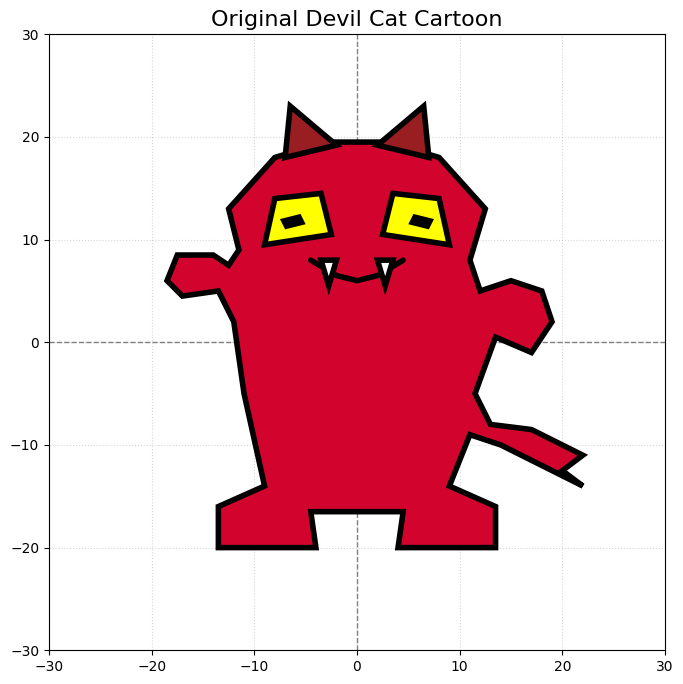

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
draw_cat_on_axis(ax, Shapes)
ax.set_aspect('equal')
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.axvline(0, color='gray', linestyle='--', linewidth=1)
ax.grid(True, linestyle=':', alpha=0.5)
plt.title("Original Devil Cat Cartoon", fontsize=16)
plt.show()


In [ ]:
# Part i) Anticlockwise Rotation about the origin with an angle 90 degree

# Creating the rotation matrix
angle_rad = np.radians(90)
c, s = np.cos(angle_rad), np.sin(angle_rad)
rotation_matrix = np.array([
    [c, -s],
    [s, c]
])

In [ ]:
def apply_transformation(shapes, transform_matrix):
    transformed_shapes = {}
    for name, coords in shapes.items():
        if name == 'mouth_line':
            original_points = np.array(coords).T
        else:
            original_points = np.array(coords)

        # Apply transformation by first transposing, and then multiplying the matrix
        transformed_points = np.dot(original_points, np.transpose(transform_matrix))

        if name == 'mouth_line':
            transformed_shapes[name] = (transformed_points[:, 0], transformed_points[:, 1])
        else:
            transformed_shapes[name] = [tuple(point) for point in transformed_points]

    return transformed_shapes

In [ ]:
# Performing the AntiClockwise Rotation
rotated_shapes = apply_transformation(Shapes, rotation_matrix)

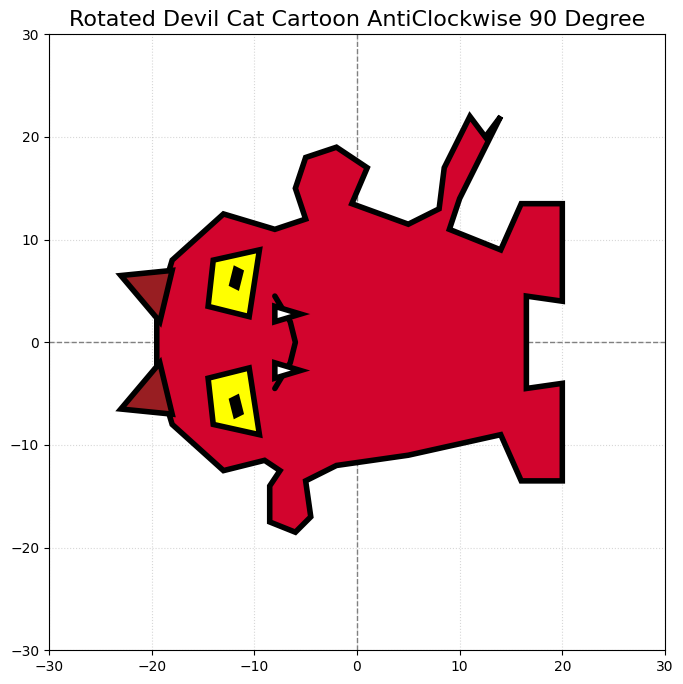

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
draw_cat_on_axis(ax, rotated_shapes)
ax.set_aspect('equal')
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.axvline(0, color='gray', linestyle='--', linewidth=1)
ax.grid(True, linestyle=':', alpha=0.5)
plt.title("Rotated Devil Cat Cartoon AntiClockwise 90 Degree", fontsize=16)
plt.show()


In [ ]:
# Part ii) Compression by a factor of 1/4 along y-axis.

Compression_Matrix = np.array([
    [1, 0],
    [0, 0.25]
])
compressed_shapes = apply_transformation(Shapes, Compression_Matrix)

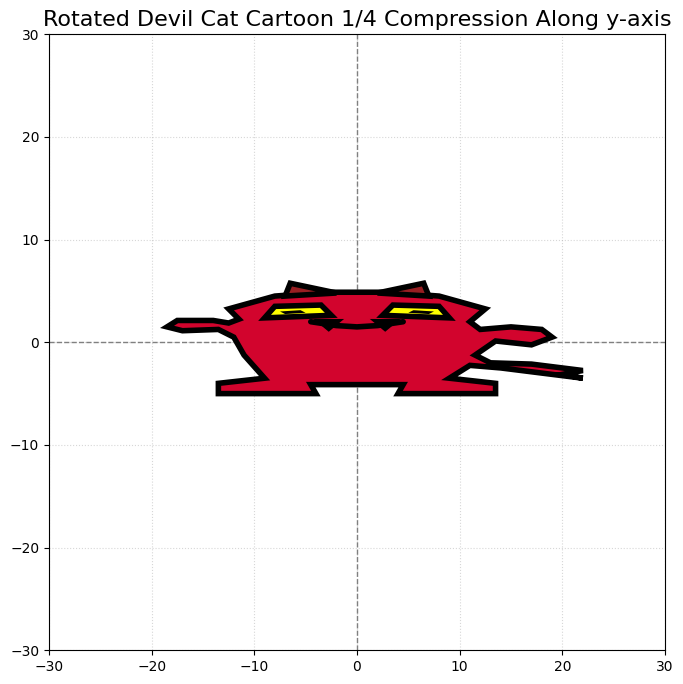

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
draw_cat_on_axis(ax, compressed_shapes)
ax.set_aspect('equal')
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.axvline(0, color='gray', linestyle='--', linewidth=1)
ax.grid(True, linestyle=':', alpha=0.5)
plt.title("Rotated Devil Cat Cartoon 1/4 Compression Along y-axis", fontsize=16)
plt.show()

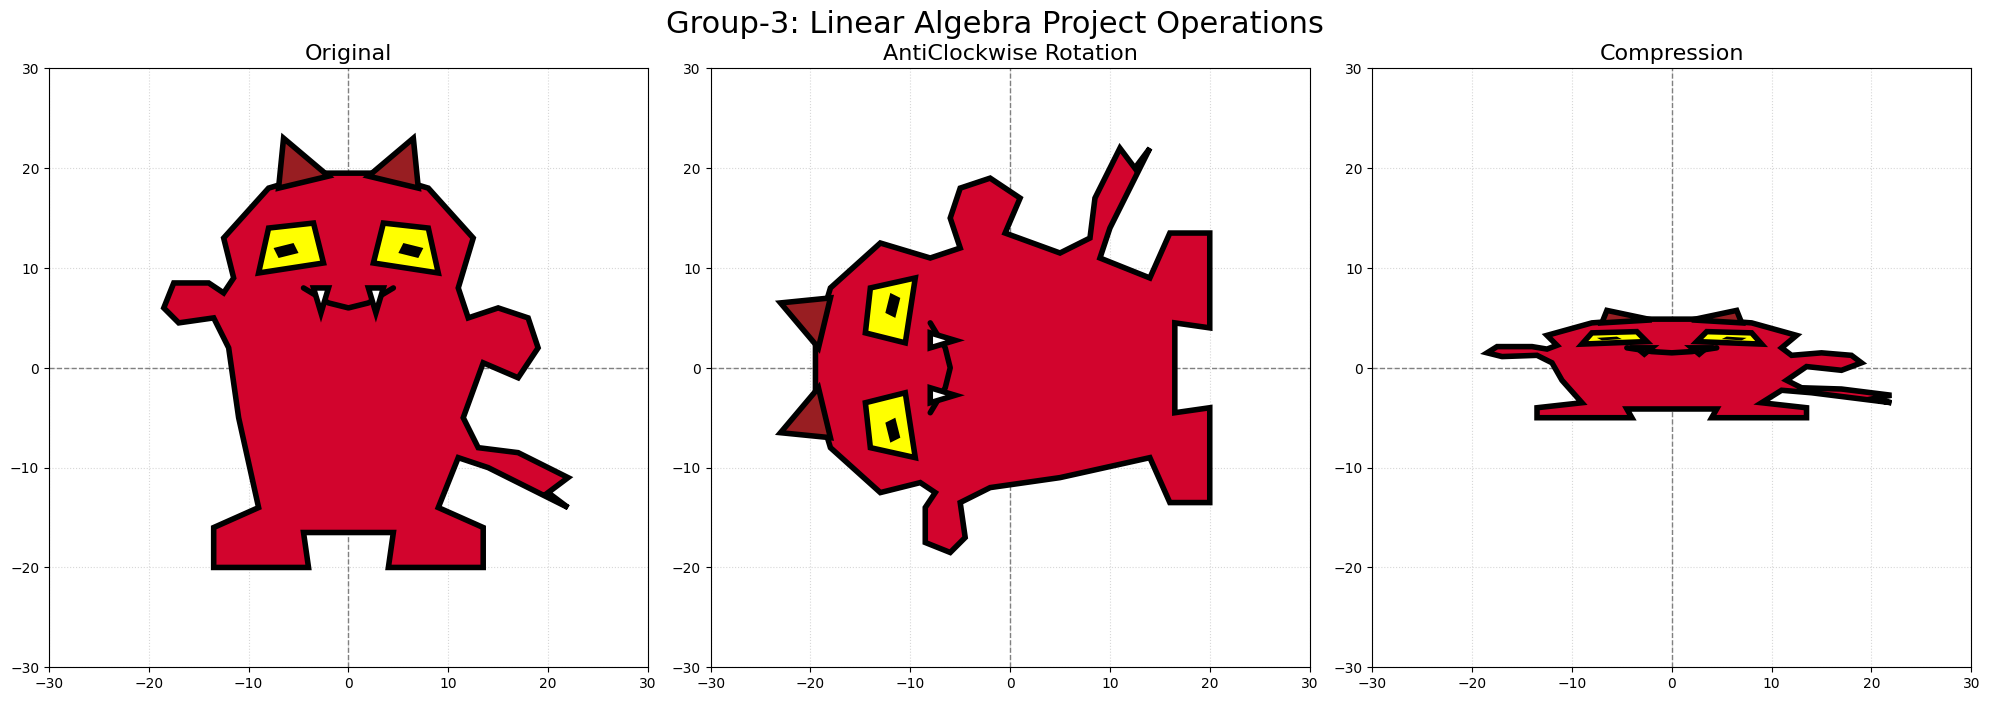

In [ ]:
# Side By Side Comparison

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle("Group-3: Linear Algebra Project Operations", fontsize=22)

# Plot 1: Original
draw_cat_on_axis(ax1, Shapes)
ax1.set_title("Original", fontsize=16)

# Plot 2: AntiClockwise Rotation
draw_cat_on_axis(ax2, rotated_shapes)
ax2.set_title("AntiClockwise Rotation", fontsize=16)

#Plot 3: Compression
draw_cat_on_axis(ax3, compressed_shapes)
ax3.set_title("Compression", fontsize=16)

for ax in (ax1, ax2, ax3):
    ax.set_aspect('equal')
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.axvline(0, color='gray', linestyle='--', linewidth=1)
    ax.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()